In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip dataset.zip?dl=0

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.losses import categorical_crossentropy


In [5]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [7]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices


Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [10]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 28709 images belonging to 7 classes.


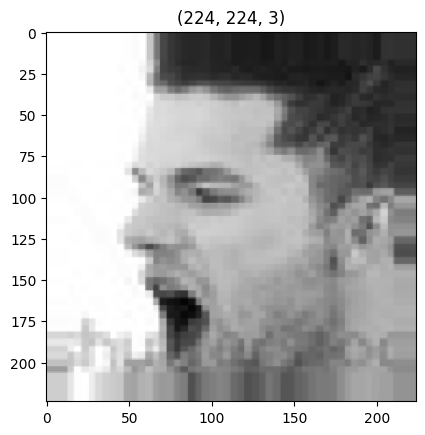

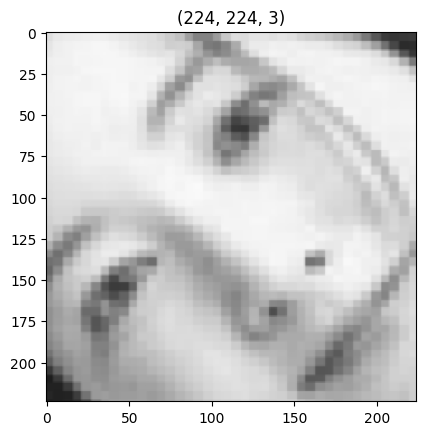

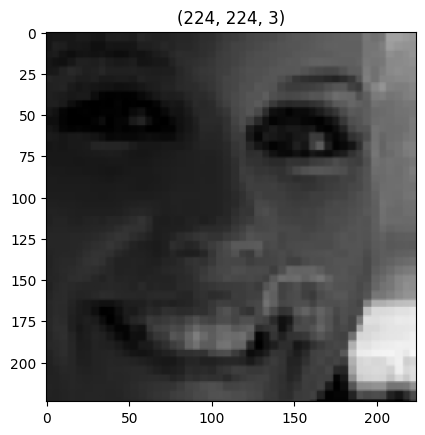

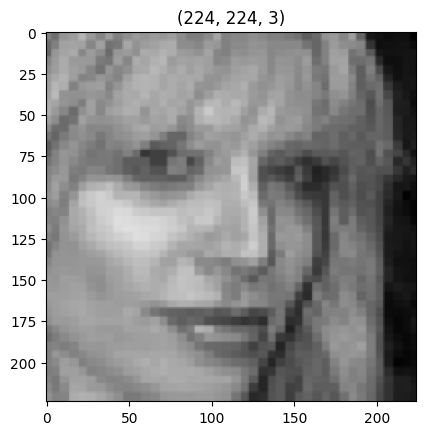

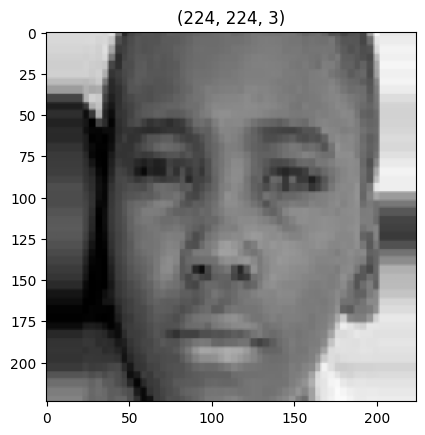

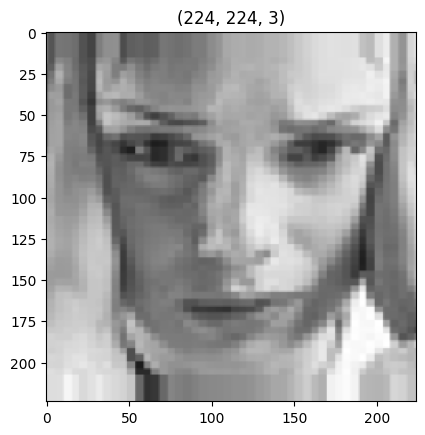

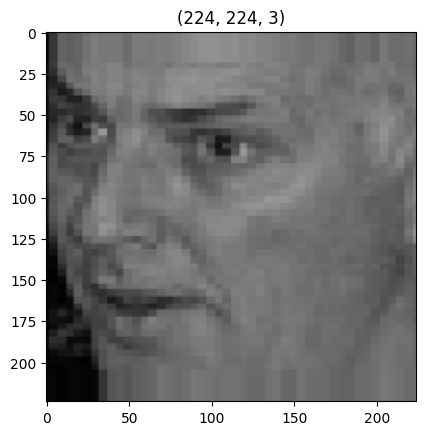

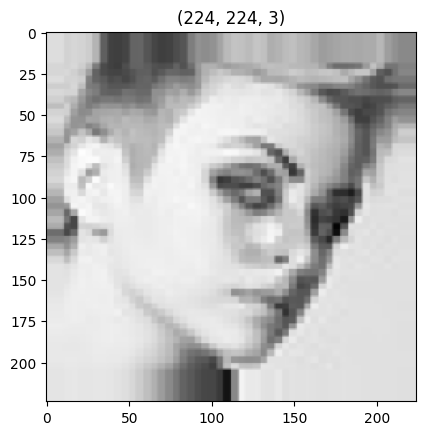

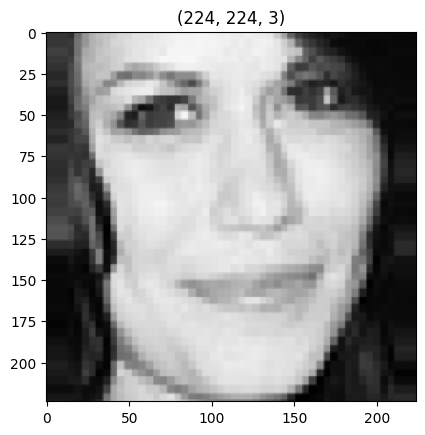

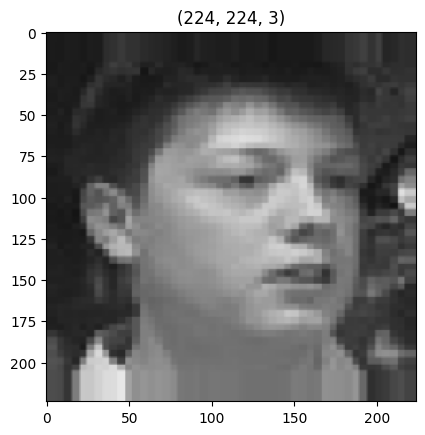

In [13]:
# to visualize the images in the traing data denerator

t_img, label = train_data.__next__()

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [19]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [21]:
hist = model.fit(train_data,
                steps_per_epoch= 10,
                epochs= 30,
                validation_data= val_data,
                validation_steps= 8,
                callbacks=[es,mc])


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2121 - loss: 10.3998
Epoch 1: val_accuracy improved from -inf to 0.28125, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.2150 - loss: 10.5124 - val_accuracy: 0.2812 - val_loss: 9.2481
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2292 - loss: 10.3490
Epoch 2: val_accuracy improved from 0.28125 to 0.37109, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.2374 - loss: 10.2397 - val_accuracy: 0.3711 - val_loss: 8.2610
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3650 - loss: 10.2136
Epoch 3: val_accuracy improved from 0.37109 to 0.42188, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.3670 - loss: 10.1118 - val_accuracy: 0.4219 - val_loss: 6.7321
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3221 - loss: 7.0552
Epoch 4: val_accuracy did not improve from 0.42188
10/10 ━━━━━━━

In [22]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.keras")

In [23]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

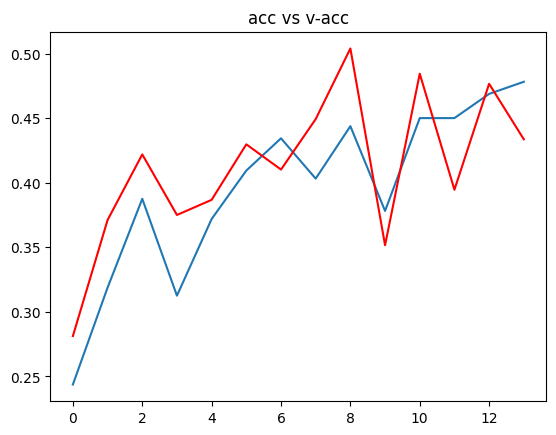

In [25]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

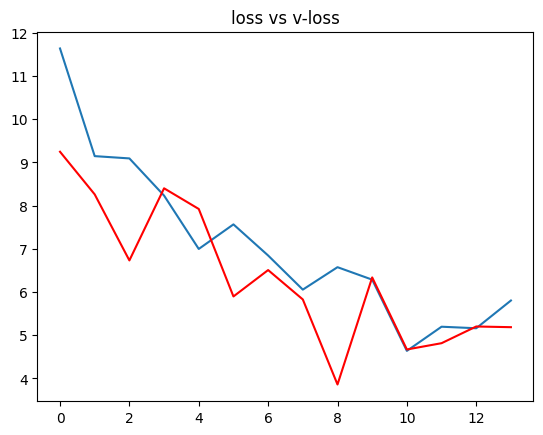

In [26]:

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [27]:

# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
 the image is of happy


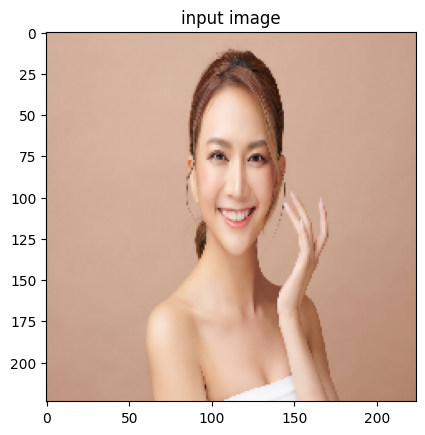

In [29]:
# path for the image to see if it predics correct class

# path = "/content/test/angry/PrivateTest_1054527.jpg"
path = "/content/demo_emotion.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()